### Importing Libraries

In [ ]:
# important packages

import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis
import seaborn as sns				# Statistical data visualization
import cv2							# Image and Video processing library

import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

pd.set_option('display.max_colwidth',1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import re # for regular expressions

import nltk # for text manipulation
nltk.download('punkt') # Punkt Sentence Tokenizer

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option('display.max_colwidth',1000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
tf.config.list_physical_devices('TPU')

[]

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from tqdm import tqdm

### Importing Dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/train.txt")
df_test = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/test_samples.txt")
df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


In [ ]:
df = df.drop("tweet_id", axis = 1)
df.head()

,sentiment,tweet_text
0,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21465 entries, 0 to 21464
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   21465 non-null  object
 1   tweet_text  21465 non-null  object
dtypes: object(2)
memory usage: 335.5+ KB


In [ ]:
df["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
df.shape

(21465, 2)

### Data Cleaning

In [ ]:
#### Removing Twitter Handles (@user)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

df['tweet_text1'] = np.vectorize(remove_pattern)(df['tweet_text'], "@[\w]*")
df.head()

,sentiment,tweet_text,tweet_text1
0,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via No Barack Obama - Vote Mitt Romney


In [ ]:
#### Removing Punctuations, Numbers, and Special Characters

df['tweet_text1'] = df['tweet_text1'].str.replace("[^a-zA-Z#]", " ")
df.head()

,sentiment,tweet_text,tweet_text1
0,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),Gas by my house hit I u m going to Chapel Hill on Sat
1,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott is still shit u c watch Rafa and Johnny deal with him on Saturday
2,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,its not that I u m a GSP fan u c i just hate Nick Diaz can u t wait for february
3,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel u s Iron Dome can u t deal with their missiles keep talking like that and we may end up finding out
4,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran u c Mon Amour Obama Tried to Establish Ties with the Mullahs http t co TZZzrrKa via No Barack Obama Vote Mitt Romney


In [ ]:
#def remove_trailing_spaces(input_txt):

for i in range(df.shape[0]):
    df['tweet_text1'][i] = re.sub(r'\s+', ' ', df['tweet_text1'][i]).strip()
df.head()

,sentiment,tweet_text,tweet_text1
0,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),Gas by my house hit I u m going to Chapel Hill on Sat
1,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott is still shit u c watch Rafa and Johnny deal with him on Saturday
2,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,its not that I u m a GSP fan u c i just hate Nick Diaz can u t wait for february
3,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel u s Iron Dome can u t deal with their missiles keep talking like that and we may end up finding out
4,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran u c Mon Amour Obama Tried to Establish Ties with the Mullahs http t co TZZzrrKa via No Barack Obama Vote Mitt Romney


In [ ]:
df = df.drop("tweet_text", axis = 1)
df.head()

,sentiment,tweet_text1
0,positive,Gas by my house hit I u m going to Chapel Hill on Sat
1,negative,Theo Walcott is still shit u c watch Rafa and Johnny deal with him on Saturday
2,negative,its not that I u m a GSP fan u c i just hate Nick Diaz can u t wait for february
3,negative,Iranian general says Israel u s Iron Dome can u t deal with their missiles keep talking like that and we may end up finding out
4,neutral,Tehran u c Mon Amour Obama Tried to Establish Ties with the Mullahs http t co TZZzrrKa via No Barack Obama Vote Mitt Romney


### Dataset Visualization

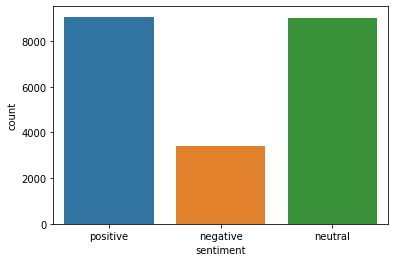

In [ ]:
sns.countplot(df['sentiment'], label = "Count")

In [ ]:
positive = df[df["sentiment"] == 'positive']
negative = df[df["sentiment"] == 'negative']
neutral = df[df["sentiment"] == 'neutral']

In [ ]:
positive_percentage = (positive.shape[0]/df.shape[0])*100
negative_percentage = (negative.shape[0]/df.shape[0])*100
neutral_percentage = (neutral.shape[0]/df.shape[0])*100
print(f"Positve Tweets = {positive_percentage:.2f}%\nNegative Tweets = {negative_percentage:.2f}%\nNeutral Tweets = {neutral_percentage:.2f}%")

Positve Tweets = 42.23%
Negative Tweets = 15.78%
Neutral Tweets = 41.99%


### Data Preprocessing

In [ ]:
X = df.iloc[:, 1].values.reshape(-1,1)
y = df.iloc[:, 0].values.reshape(-1,1)

In [ ]:
print(X.shape)
print(X)

(21465, 1)
[['Gas by my house hit I u m going to Chapel Hill on Sat']
 ['Theo Walcott is still shit u c watch Rafa and Johnny deal with him on Saturday']
 ['its not that I u m a GSP fan u c i just hate Nick Diaz can u t wait for february']
 ...
 ['Luca Di Montezemolo who s last day was Monday on why Alonso is leaving Ferrari http t co ltJoCPubSc']
 ['Coffee is pretty much the answer to all questions today #Friday #tgif']
 ['Niki Lauda just confirmed to Sky that Alonso was released of contact on Thursday night http t co KaxENVzfCH']]


In [ ]:
print(y.shape)
print(y)

(21465, 1)
[['positive']
 ['negative']
 ['negative']
 ...
 ['neutral']
 ['positive']
 ['neutral']]


###One Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [ ]:
print(y.shape)
print(y)

(21465, 3)
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


### Universal Sentence Encoder

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
def embed(input):
  return model(input)

In [ ]:
X1=[]
for text in tqdm(X):
    text_embeddings = embed(text)
    text_embeddings = tf.reshape(text_embeddings, [-1]).numpy()
    X1.append(text_embeddings)
X = np.array(X1)

100%|██████████| 21465/21465 [00:59<00:00, 363.23it/s]


In [ ]:
print(X.shape)
print(X)

(21465, 512)
[[-0.01353925  0.00452292 -0.0051504  ... -0.06212144 -0.04615136
   0.02903157]
 [ 0.04401391 -0.07311478 -0.0790114  ...  0.05478439 -0.08115162
  -0.06605653]
 [ 0.03522526 -0.03632013  0.0630427  ...  0.01618096 -0.07262912
  -0.08284394]
 ...
 [ 0.00595112 -0.02229385 -0.04835943 ...  0.05665983 -0.04666452
  -0.08091518]
 [-0.01971209 -0.07663645 -0.0064224  ... -0.06073892 -0.01539536
   0.0407248 ]
 [-0.00469222  0.02543153 -0.02942087 ...  0.04685711 -0.06576025
  -0.08431066]]


In [ ]:
X_train = X
y_train = y

# Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()
model.add(Input(shape = (X_train.shape[1], )))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation = 'softmax'))

## Look at summary of defined model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 387       
Total params: 164,611
Trainable params: 164,611
Non-trainable params: 0
_________________________________________________________________


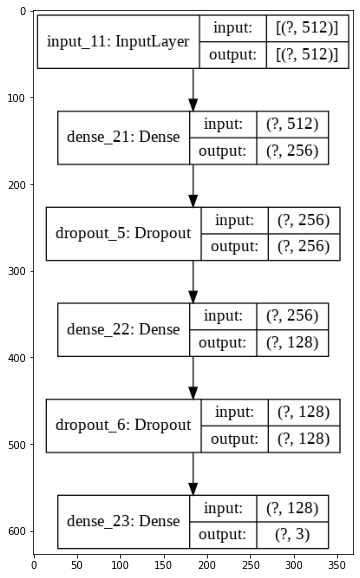

In [ ]:
%matplotlib inline
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(20,10))
imgplot = plt.imshow(img) 

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 9,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 4,
                              verbose = 1,
                              min_delta = 0.0001)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001),
              metrics = ['accuracy'])

#callbacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
history = model.fit( X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1, 
                    shuffle=True,
                    #callbacks = callbacks
)

Epoch 1/10
537/537 [==============================] - 2s 3ms/step - loss: 0.8402 - accuracy: 0.5908 - val_loss: 0.7985 - val_accuracy: 0.6028
Epoch 2/10
537/537 [==============================] - 1s 3ms/step - loss: 0.7592 - accuracy: 0.6451 - val_loss: 0.7887 - val_accuracy: 0.6042
Epoch 3/10
537/537 [==============================] - 1s 3ms/step - loss: 0.7284 - accuracy: 0.6650 - val_loss: 0.7904 - val_accuracy: 0.6166
Epoch 4/10
537/537 [==============================] - 1s 3ms/step - loss: 0.7037 - accuracy: 0.6781 - val_loss: 0.7996 - val_accuracy: 0.6028
Epoch 5/10
537/537 [==============================] - 1s 3ms/step - loss: 0.6770 - accuracy: 0.6979 - val_loss: 0.8206 - val_accuracy: 0.6054
Epoch 6/10
537/537 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.7092 - val_loss: 0.8221 - val_accuracy: 0.6080
Epoch 7/10
537/537 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.7240 - val_loss: 0.8350 - val_accuracy: 0.6049
Epoch 

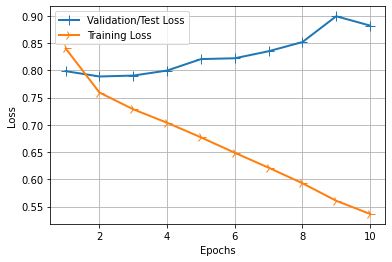

In [ ]:
# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

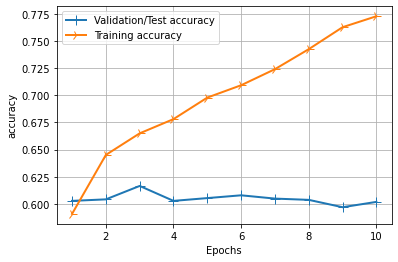

In [ ]:
# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test accuracy')
line2 = plt.plot(epochs, loss_values, label='Training accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Hyper paramaeter Tuning

### No Drop Layer

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 387       
Total params: 164,611
Trainable params: 164,611
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
537/537 [==============================] - 1s 3ms/step - loss: 0.7930 - accuracy: 0.6191 - val_loss: 0.7956 - val_accuracy: 0.6040
Epoch 2/10
537/537 [==============================] - 1s 3ms/step - loss: 0.7160 - accuracy: 0.6727 - val_loss: 0.7897 - val_accuracy: 0.6110
Epoch 3/10
537/537 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0

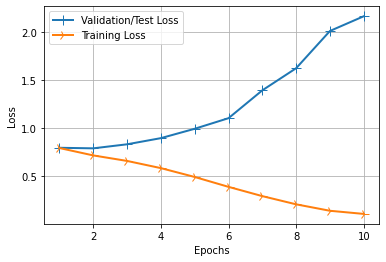

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()
model.add(Input(shape = (X_train.shape[1], )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

## Look at summary of defined model
model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001),
              metrics = ['accuracy'])

history = model.fit( X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1, 
                    shuffle=True,
                    #callbacks = callbacks
)

# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

##### Adding drop layer decrease val_loss and also avoid over-fitting to some extent

##### In above graph, over-fitting occurs early

### Removing Layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 132,099
Trainable params: 132,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
521/537 [============================>.] - ETA: 0s - loss: 0.8179 - accuracy: 0.6108
Epoch 00001: val_loss improved from inf to 0.81111, saving model to /content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_remove_layer.h5
537/537 [==============================] - 2s 4ms/step - loss: 0.8173 - accuracy: 0.6119 - val_loss: 0.8111 - val_accuracy: 0.60

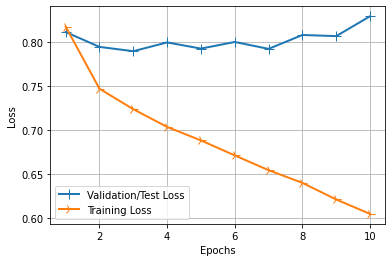

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()
model.add(Input(shape = (X_train.shape[1], )))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation = 'softmax'))

## Look at summary of defined model
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_remove_layer.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

callbacks = [checkpoint]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001),
              metrics = ['accuracy'])

history = model.fit( X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1, 
                    shuffle=True,
                    callbacks = callbacks
)

# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

##### Decreaing Layers in Model also overcome overfitting to some extent till 7 epochs but there is no improvement in val_acc

### Adding kernel Regularizer

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 387       
Total params: 164,611
Trainable params: 164,611
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
521/537 [============================>.] - ETA: 0s - loss: 1.0599 - accuracy: 0.5897
Epoch 00001: val_l

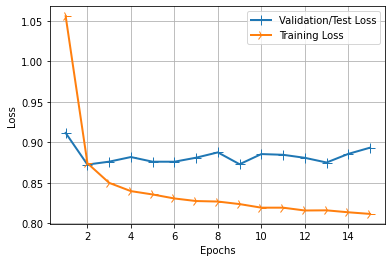

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers

model = Sequential()
model.add(Input(shape = (X_train.shape[1], )))
model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.001) ))
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.001) ))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation = 'softmax', ))

## Look at summary of defined model
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_regulizer.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

callbacks = [checkpoint]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001),
              metrics = ['accuracy'])

history = model.fit( X_train, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1, 
                    shuffle=True,
                    callbacks = callbacks
)

# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

##### It helps to avoid over-fitting. Also val_accuracy improves a little

# Testing

In [ ]:
df_test.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor, margate, ocean city area. I'm just waiting for the coordinator to hopefully call me tomorrow"
1,218775148495515649,"Musical awareness: Great Big Beautiful Tomorrow has an ending, Now is the time does not"
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour analyst Shawn Hattingh: Cosatu's role in the context of unrest in the mining http://t.co/46pjzzl6
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susah Susah.usaha Aja blm udh nyerah,inget.if you never try you'll never know.cowok kok gentle bgt"
4,171874368908050432,"Excuse the connectivity of this live stream, from Baba Amr, so many activists using only one Sat Modem. LIVE http://t.co/U283IhZ5 #Homs"


In [ ]:
X_test = df_test.iloc[:, 1].values.reshape(-1,1)
print(X_test.shape)
print(X_test)

(5398, 1)
[["@jjuueellzz down in the Atlantic city, ventnor, margate, ocean city area. I'm just waiting for the coordinator to hopefully call me tomorrow"]
 ['Musical awareness: Great Big Beautiful Tomorrow has an ending, Now is the time does not']
 ["On Radio786 100.4fm 7:10 Fri Oct 19 Labour analyst Shawn Hattingh: Cosatu's role in the context of unrest in the mining http://t.co/46pjzzl6"]
 ...
 ['For the 1st time in 30 years. For your splendiferous entertainment. Arts in Lechlade proudly presents an OLD... http://t.co/Qg0XaxTV']
 ['NURSES DAY - 12 MAY 2012. Nursing: The heart beat of the health']
 ['We have 15 minutes left until the 2nd episode of Styled To Rock. #UKNavi #RihannaNavy']]


In [ ]:
X1_test=[]
for text in tqdm(X_test):
    text_embeddings = embed(text)
    text_embeddings = tf.reshape(text_embeddings, [-1]).numpy()
    X1_test.append(text_embeddings)
X_test = np.array(X1_test)

100%|██████████| 5398/5398 [00:13<00:00, 400.15it/s]


In [ ]:
print(X_test.shape)
print(X_test)

(5398, 512)
[[ 0.04658458  0.03334372 -0.0141405  ... -0.04216626 -0.02091187
   0.03847291]
 [ 0.00027606 -0.0531951   0.099721   ... -0.06182418  0.01635462
   0.05719262]
 [ 0.0429181   0.03825824 -0.01438171 ... -0.03312026  0.00051474
  -0.00824738]
 ...
 [-0.02181326 -0.01196247  0.08394908 ... -0.06283744  0.04121457
   0.03618909]
 [-0.02717727 -0.07256508 -0.05641653 ...  0.06834961 -0.04527941
   0.00853692]
 [-0.00380317 -0.05477651  0.02005079 ...  0.00934494  0.03767626
   0.04911034]]


# Model Prediction

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_regulizer.h5')

In [ ]:
y_test = classifier.predict(X_test, verbose = 1)

169/169 [==============================] - 0s 1ms/step


In [ ]:
print(y_test)
print(y_test.shape)

[[0.0368787  0.48989236 0.47322893]
 [0.04727456 0.0799028  0.8728227 ]
 [0.13143289 0.68730634 0.18126084]
 ...
 [0.03684101 0.14783026 0.8153287 ]
 [0.04355514 0.53024614 0.42619878]
 [0.04079981 0.3923145  0.5668857 ]]
(5398, 3)


In [ ]:
labels = ["negative", "neutral", "positive"]
y_pred = []
for p in y_test:
    y_pred.append(labels[np.argmax(p)])

In [ ]:
print(len(y_pred))
print(y_pred)

5398
['neutral', 'positive', 'neutral', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'po

In [ ]:
list1 = []
heading = ['tweet_id', 'sentiment']

list1.append(heading)

for i in range(len(y_pred)):
        sub = []
        sub.append(df_test["tweet_id"][i])
        sub.append(y_pred[i])
        list1.append(sub)

# Generate Submission File

In [ ]:
import csv
with open('/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/Tweet_end_test_result_reg.csv', 'w', newline='') as fp:
    a = csv.writer(fp, delimiter = ",")
    data = list1
    a.writerows(data)

### Test Accuracy = 66.558%